# Reproduce  G. F. Tierney, et. al , Nanoscale Adv., 2019,1, 2546-2552  

This notebook demonstrates reproducing the results of the paper with [Larch](https://xraypy.github.io/xraylarch/xafs/) using the corresponding published dataset (raw data). 


 George F. Tierney, Donato Decarolis,   Norli Abdullah, Scott M. Rogers, Shusaku Hayama, Martha Briceno de Gutierrez, Alberto Villa, C. Richard A. Catlow, Paul Collier, Nikolaos Dimitratos  and  Peter P. Wells (2019) **Extracting structural information of Au colloids at ultra-dilute concentrations: identification of growth during nanoparticle immobilization.** Nanoscale Advances. V. 1. pp. 2546-2552. DOI: [10.1039/C9NA00159J](https://doi.org/10.1039/C9NA00159J).

- **Corresponding author**: Nikolaos Dimitratos
- **E-mail**: nikolaos.dimitratos@unibo.it

The data used for reproducing the results was published in the Southampton Instituional Repository [doi:10.5258/SOTON/D0921](https://eprints.soton.ac.uk/431377/)

For more details about Larch, see [Larch Website](https://xraypy.github.io/xraylarch/xafs/)

## Reproducing XAS analysis

The XAS results of the paper are in [Figure 3](https://pubs.rsc.org/image/article/2019/na/c9na00159j/c9na00159j-f3_hi-res.gif): with the caption and the metadata indicate which data can be used for reproducing the results presented.

**Figure Caption**
> **Fig. 3** XAFS taken at the Au L3-edge of the colloidal Au samples; **(a & d) XANES spectra for the colloidal Au** detailing change as a result of increasing synthesis temperature and Au concentration, **(b & e) the normalised first derivative** of the absorption for the temperature and Au concentration influenced colloids respectively and (c & f) **experimental Fourier transform (FT) chi(k) data** of the corresponding EXAFS signals for colloidal Au showing the influence of temperature and Au concentration. 



In [1]:
# Library with the functions that replicate athena:
# normalisation, merging, re-binning, LCF
# and visualisation (plotting)
import lib.manage_athena as athenamgr  

import lib.manage_fit as fitmgr

# File handling
from pathlib import Path

#plotting library
import matplotlib.pyplot as plt
# inline: shows plot in notebook
# tk: shows plot in popup
%matplotlib inline 

gold_data = "C:\harwell\PSDI_test\wf_data\pub_267\DS0211\Compiled_XAS_data_Colloid_and_TiO2_supported_Au.prj"
# read the input file 

data_prj = athenamgr.read_project(gold_data)
standard_mappings={"A1":"d_0_1mM_Au_1C_Colloid",
                   "A2":"d_0_1mM_Au_25C_Colloid",
                   "A3":"d_0_1mM_Au_50C_Colloid",
                   "A4":"d_0_1mM_Au_75C_Colloid",
                   "B":"d_0_05mM_Au_1C_Colloid",
                   "C":"d_1_25mM_Au_1C_Colloid",
                   "Au Foil":"Au_foil",}

data_groups = {}
for a_mapping in standard_mappings:
    data_groups[a_mapping] = athenamgr.calc_with_defaults(athenamgr.get_group(data_prj, standard_mappings[a_mapping]))
    
    data_groups[a_mapping].filename = a_mapping



### Reproduce figure 3a 


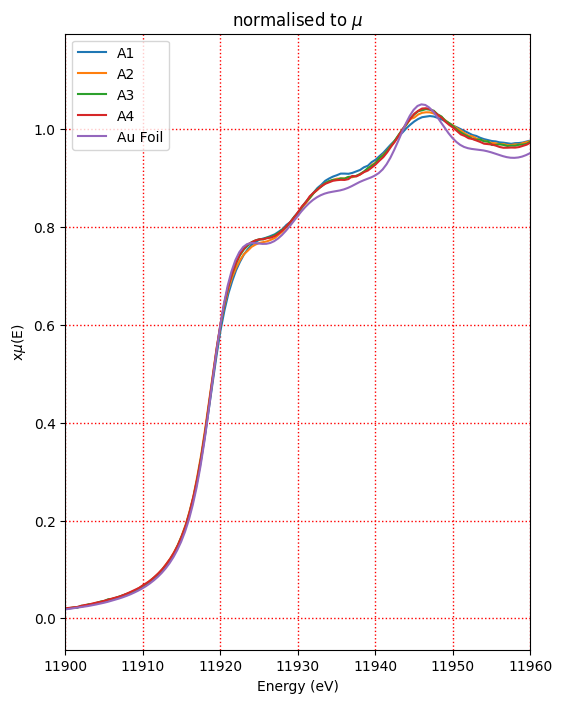

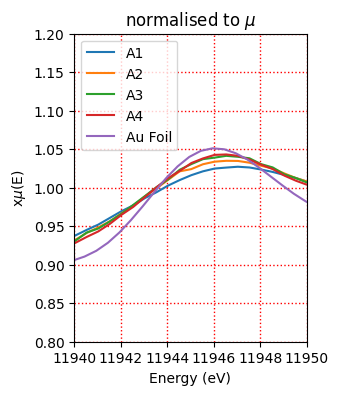

In [2]:
plot_groups = ["A1", "A2", "A3", "A4", "Au Foil"]
# large plot
plt.figure(figsize=(6,8))
for a_sample in plot_groups:
    if data_groups[a_sample].filename in plot_groups:
        plt = athenamgr.plot_normalised(data_groups[a_sample])
    
plt.xlim([11900, 11960])
plt.show()

# subplot
plt.figure(figsize=(3,4))
for a_sample in plot_groups:
    if data_groups[a_sample].filename in plot_groups:
        plt = athenamgr.plot_normalised(data_groups[a_sample])
    
plt.xlim([11940, 11950])
plt.ylim([0.8, 1.2])
plt.show()

### Reproduce figure 3b


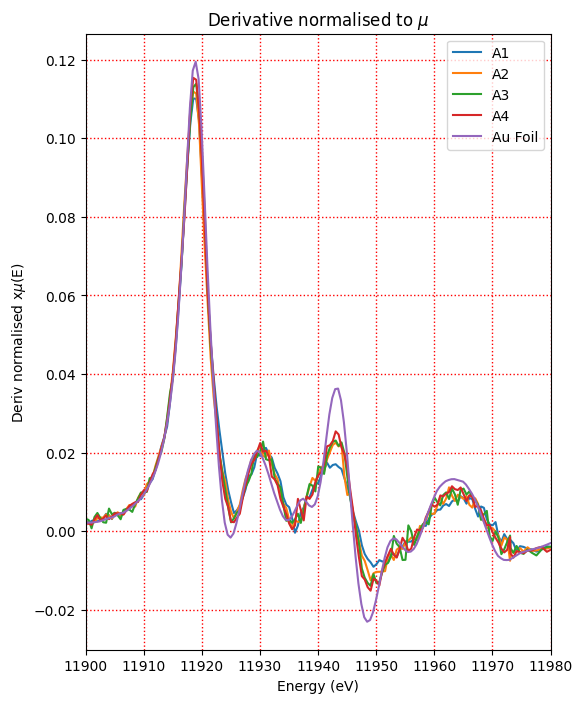

In [3]:
# plot the derivative
plt.figure(figsize=(6,8))
for a_sample in plot_groups:
    if data_groups[a_sample].filename in plot_groups:
        plt = athenamgr.plot_derivative(data_groups[a_sample])
    
plt.xlim([11900, 11980])
plt.show()


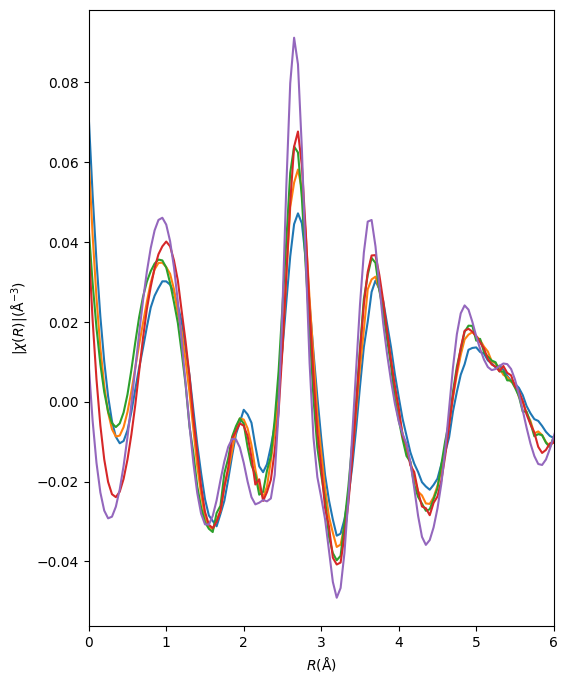

In [33]:
# large plot
def plot_chi_magnitude(athena_groups = {}, include_groups = [], aspect = (6,8), xlim=[]):
    # plot using the xas data for Fe    
    plt.figure(figsize=aspect)
    for g_indx, a_group in enumerate(include_groups):
        # get index of energy value closer to where the label shoud be placed
         plt.plot(athena_groups[a_group].k, athena_groups[a_group].chi  )

    plt.ylabel("$|\chi(R)| (\mathrm{\AA}^{-3})$")
    plt.xlabel("$R(\mathrm{\AA})$")
    plt.xlim(xlim)

    return plt

plt = plot_chi_magnitude(data_groups, plot_groups, (6,8), [0,6])


plt.show()

In [34]:
data_groups["A1"]

Attribute,Type
energy,ndarray
mu,ndarray
athena_params,Group
stddev,ndarray
epsk,float
label,str
epsr,float
sel,int
datatype,str
filename,str


In [19]:
from larch.xafs import pre_edge
from larch.xafs import autobk
from larch.xafs import xftf

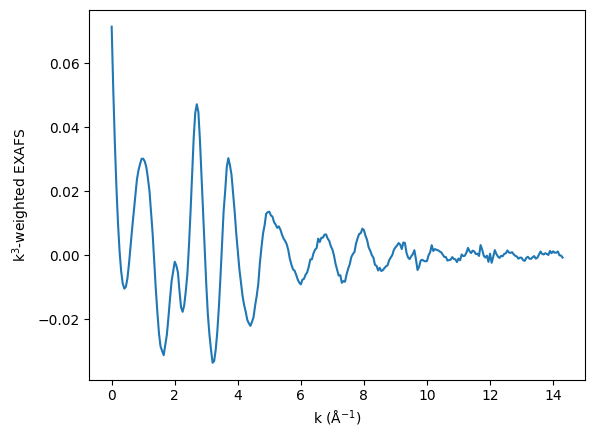

In [30]:
pre_edge(data_groups["A1"])
autobk(data_groups["A1"])
xftf(data_groups["A1"], kweight=5)

plt.plot(data_groups["A1"].k, data_groups["A1"].chi)
plt.xlabel('k (Å$^{-1}$)')
plt.ylabel('k$^3$-weighted EXAFS')
plt.show()

In [27]:
data_groups["A1"]

Attribute,Type
energy,ndarray
mu,ndarray
athena_params,Group
stddev,ndarray
epsk,float
label,str
epsr,float
sel,int
datatype,str
filename,str


In [22]:
len(data_groups["A1"].energy)

472

In [23]:
len(data_groups["A1"].mu)

472